# Importamos librerías

In [1]:
# Librerías de toda la vida
import itertools
from tqdm import tqdm
from collections import defaultdict
from collections import Counter
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from scipy import stats
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2.5})

# Creamos una lista con las columnas

In [2]:
columnas = ['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero', 'estado_civil', 'nivel_academico', 'profesion', 'ocupacion', 'tipo_vivienda', 'ult_actual',
'categoria', 'codigo_ciiu', 'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia', 'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses', 'cupo_total_tc', 'tenencia_tc',
'cuota_tc_bancolombia', 'tiene_consumo', 'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas', 'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen', 'cat_ingreso', 'ingreso_final',
'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos', 'cuota_tarjeta_de_credito',
'cuota_de_sector_solidario', 'cuota_sector_real_comercio', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo', 'cuota_tc_mdo', 'saldo_no_rot_mdo', 'cuota_libranza_sf',
'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'ind', 'rep_calif_cred', 'pol_centr_ext', 'convenio_lib', 'ingreso_nomina', 'ingreso_segurida_social',
'gasto_familiar']

columnas_test = ['id_registro','periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero', 'estado_civil', 'nivel_academico', 'profesion', 'ocupacion', 'tipo_vivienda', 'ult_actual',
'categoria', 'codigo_ciiu', 'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia', 'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses', 'cupo_total_tc', 'tenencia_tc',
'cuota_tc_bancolombia', 'tiene_consumo', 'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas', 'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen', 'cat_ingreso', 'ingreso_final',
'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos', 'cuota_tarjeta_de_credito',
'cuota_de_sector_solidario', 'cuota_sector_real_comercio', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo', 'cuota_tc_mdo', 'saldo_no_rot_mdo', 'cuota_libranza_sf',
'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'ind', 'rep_calif_cred', 'pol_centr_ext', 'convenio_lib', 'ingreso_nomina', 'ingreso_segurida_social']

# Importamos el dataset

In [3]:
## Dataset Train
from dask import dataframe as dd
from dask.diagnostics import ProgressBar

missing_values = [r"\\N", r"\N"]
with ProgressBar():
 df = dd.read_csv('Dataton_train_semicolon.csv', encoding = 'utf8', sep=";", names = columnas, low_memory = True,
                  header = None, error_bad_lines = True, na_values = missing_values, assume_missing = True,
 dtype={"periodo" : object,
 "id_cli" : np.uint32,
"fecha_nacimiento" : object,
"edad" : object,
"genero" : object,
"estado_civil" : object,
"nivel_academico" : object,
"profesion" : object,
"ocupacion" : object,
"tipo_vivienda" : object,
"ult_actual" : np.float,#convertir
"categoria" : np.float,
"codigo_ciiu" : np.float,
"ind_mora_vigente" : object,
"cartera_castigada" : object,
"ciudad_residencia" : object,
"departamento_residencia" : object,
"ciudad_laboral" : object,
"departamento_laboral" : object,
"rechazo_credito" : object,
"mora_max" : np.float,
"cant_moras_30_ult_12_meses" : np.float,
"cant_moras_60_ult_12_meses" : np.float,
"cant_moras_90_ult_12_meses" : np.float,
"cupo_total_tc" : np.float,
"tenencia_tc" : object,
"cuota_tc_bancolombia" : np.float,
"tiene_consumo" : object,
"tiene_crediagil" : object,
"nro_tot_cuentas" : np.float,
"ctas_activas" : np.float,
"tiene_ctas_activas" : object,
"ctas_embargadas" : np.float,
"tiene_ctas_embargadas" : object,
"pension_fopep" : object,
"cuota_cred_hipot" : np.float,
"tiene_cred_hipo_1" : object,
"tiene_cred_hipo_2" : object,
"mediana_nom3" : np.float,
"mediana_pen3" : np.float,
"ingreso_nompen" : np.float,
"cat_ingreso" : object,
"ingreso_final" : np.float,
"cant_mora_30_tdc_ult_3m_sf" : np.float,
"cant_mora_30_consum_ult_3m_sf" : np.float,
"cuota_de_vivienda" : np.float,
"cuota_de_consumo" : np.float,
"cuota_rotativos" : np.float,
"cuota_tarjeta_de_credito" : np.float,
"cuota_de_sector_solidario" : np.float,
"cuota_sector_real_comercio" : np.float,
"cupo_tc_mdo" : np.float,
"saldo_prom3_tdc_mdo" : np.float,
"cuota_tc_mdo" : np.float,
"saldo_no_rot_mdo" : np.float,
"cuota_libranza_sf" : np.float,
"cant_oblig_tot_sf" : np.float,
"cant_cast_ult_12m_sr" : np.float,
"ind" : np.float,
"rep_calif_cred" : object,
"pol_centr_ext" : np.float,
"convenio_lib" : object,
"ingreso_nomina" : np.float,
"ingreso_segurida_social" : np.float,
"gasto_familiar" : np.float,
 })
df.head()

#df = dd.read_csv(filename, header=None, names = list_, blocksize=64000000, low_memory=False)

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908,2089776,19840630,35.05817932922655,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1173431.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903000.0,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,232526.0
1,201909,2089776,19840630,35.14305270362765,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1173431.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903000.0,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,265900.0
2,201907,2089776,19840630,34.96235455167693,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1172612.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903000.0,0.0,1.0,0.0,311306.0,C,0.0,NaN,1255032.0,NaN,243052.0
3,201903,2089776,19840630,34.63928815879535,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1282673.0,0.0,1282673.0,NOM,1172612.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2433000.0,0.0,1.0,0.0,311306.0,C,0.0,NaN,1172612.0,NaN,276014.0
4,201911,2089776,19840630,35.30732375085558,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1355032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,677516.0,C,0.0,NaN,1255032.0,NaN,418866.0


In [4]:
## Dataset Test

missing_values = [r"\\N", r"\N"]
with ProgressBar():
 df_test = dd.read_csv('dt2020_base_evaluar_semicolon.csv', encoding = 'utf8', sep=";", names = columnas_test, low_memory = True,
                  header = 0, error_bad_lines = True, na_values = missing_values, assume_missing = True,
 dtype={"id_registro":object,
"periodo" : object,
"id_cli" : np.uint32,
"fecha_nacimiento" : object,
"edad" : object,
"genero" : object,
"estado_civil" : object,
"nivel_academico" : object,
"profesion" : object,
"ocupacion" : object,
"tipo_vivienda" : object,
"ult_actual" : np.float,#convertir
"categoria" : np.float,
"codigo_ciiu" : np.float,
"ind_mora_vigente" : object,
"cartera_castigada" : object,
"ciudad_residencia" : object,
"departamento_residencia" : object,
"ciudad_laboral" : object,
"departamento_laboral" : object,
"rechazo_credito" : object,
"mora_max" : np.float,
"cant_moras_30_ult_12_meses" : np.float,
"cant_moras_60_ult_12_meses" : np.float,
"cant_moras_90_ult_12_meses" : np.float,
"cupo_total_tc" : np.float,
"tenencia_tc" : object,
"cuota_tc_bancolombia" : np.float,
"tiene_consumo" : object,
"tiene_crediagil" : object,
"nro_tot_cuentas" : np.float,
"ctas_activas" : np.float,
"tiene_ctas_activas" : object,
"ctas_embargadas" : np.float,
"tiene_ctas_embargadas" : object,
"pension_fopep" : object,
"cuota_cred_hipot" : np.float,
"tiene_cred_hipo_1" : object,
"tiene_cred_hipo_2" : object,
"mediana_nom3" : np.float,
"mediana_pen3" : np.float,
"ingreso_nompen" : np.float,
"cat_ingreso" : object,
"ingreso_final" : np.float,
"cant_mora_30_tdc_ult_3m_sf" : np.float,
"cant_mora_30_consum_ult_3m_sf" : np.float,
"cuota_de_vivienda" : np.float,
"cuota_de_consumo" : np.float,
"cuota_rotativos" : np.float,
"cuota_tarjeta_de_credito" : np.float,
"cuota_de_sector_solidario" : np.float,
"cuota_sector_real_comercio" : np.float,
"cupo_tc_mdo" : np.float,
"saldo_prom3_tdc_mdo" : np.float,
"cuota_tc_mdo" : np.float,
"saldo_no_rot_mdo" : np.float,
"cuota_libranza_sf" : np.float,
"cant_oblig_tot_sf" : np.float,
"cant_cast_ult_12m_sr" : np.float,
"ind" : np.float,
"rep_calif_cred" : object,
"pol_centr_ext" : np.float,
"convenio_lib" : object,
"ingreso_nomina" : np.float,
"ingreso_segurida_social" : np.float})
df_test=df_test.compute()   # Para dejarlo en formato pandas.DataFrame
df_test.set_index("id_registro", inplace=True)
df_test.index.name = None
df_test.head()

#df = dd.read_csv(filename, header=None, names = list_, blocksize=64000000, low_memory=False)

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social
12154#201902,201902,12154,19430621,75.57563312799452,M,CASADO,BACHILLER,NaN,Desempleado con Ingresos,PROPIA,20180525.0,1.0,10.0,N,N,PEREIRA ...,RISARALDA ...,PEREIRA ...,RISARALDA ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,10864507.00,0.0,0.0,0.000,0.0,0.0,52000.0,0.0,0.0,1000000.0,0.0,0.0,262000.0,0.0,1.0,0.0,6.412382e+06,H,1.0,NaN,NaN,NaN
374#201902,201902,374,19810909,37.35523613963039,F,SOLTERO,NO INFORMA,NaN,Empleado,NaN,20170520.0,1.0,10.0,N,N,ENVIGADO ...,ANTIOQUIA ...,ENVIGADO ...,ANTIOQUIA ...,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,392516.395,X,NaN,0.0,0.0,0.0,NaN,1235000.00,0.0,0.0,392516.395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.323586e+05,C,0.0,NaN,NaN,NaN
7365#201902,201902,7365,19810311,37.85352498288843,F,NO INFORMA,NO INFORMA,NaN,Empleado,NO INFORMA,20180525.0,1.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,SIN INFORMACION ...,SIN INFORMACION ...,NaN,1.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2574230.00,0.0,0.0,0.000,0.0,0.0,28000.0,0.0,0.0,550000.0,261500.0,35000.0,0.0,0.0,1.0,0.0,1.394262e+06,D,0.0,NaN,NaN,NaN
16314#201902,201902,16314,19781030,40.21629021218344,F,CASADO,UNIVERSITARIO,CONTADURIA,Empleado,ALQUILADA,20180912.0,1.0,10.0,N,N,BUCARAMANGA ...,SANTANDER ...,BUCARAMANGA ...,SANTANDER ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,2.0,2.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1562500.0,0.0,1562500.0,NOM,6045000.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,113000.0,0.0,0.0,0.0,8323000.0,0.0,0.0,44.0,3.483775e+06,H,8.0,NaN,NaN,NaN
19374#201902,201902,19374,19790903,39.37303216974675,F,CASADO,ESPECIALIZACION,PSICOLOGIA,Profesional Independiente,FAMILIAR,20181123.0,3.0,8699.0,N,N,ENVIGADO ...,ANTIOQUIA ...,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,0.0,0.0,0.0,0.0,26500000.0,SI,450500.0,X,NaN,3.0,3.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,90754025.48,0.0,0.0,0.000,6000.0,0.0,2302000.0,0.0,0.0,139950000.0,1902500.0,1176000.0,0.0,0.0,12.0,0.0,5.554769e+07,A,0.0,NaN,NaN,NaN


# Creamos una muestra del dataset_train

In [5]:
with ProgressBar():
 df = df.sample(frac = 0.7, random_state = 42).compute()
df.head()

[########################################] | 100% Completed |  2min 11.0s


,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
25120,201907,3965564,19890316,30.25325119780972,M,CASADO,SIN INFORMACION,OTROS,Empleado,NaN,20180909.0,1.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,753023.3,X,NaN,4302445.0,0.0,4302445.0,NOM,4251824.00,0.0,0.0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3.0,0.0,-4.047465e+05,C,0.0,72318,4189346.0,NaN,2968027.28
73962,201911,2297695,19780805,41.21013004791239,M,CASADO,UNIVERSITARIO,INGENIERIA DE SISTEMAS,Empleado,FAMILIAR,20190803.0,3.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,16.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,6399950.00,0.0,0.0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9.0,0.0,-4.470298e+05,B,0.0,NaN,NaN,NaN,5982828.00
44294,201907,2593020,19670318,52.24914442162902,M,NO INFORMA,NO INFORMA,NaN,Empleado,NaN,20190419.0,1.0,10.0,N,N,BARRANQUILLA ...,ATLANTICO ...,SOLEDAD - SOLEDAD ...,ATLANTICO ...,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2039000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.039890e+06,D,0.0,NaN,NaN,NaN,111231.00
91615,202003,2317746,19870411,32.85968514715948,M,UNION LIBRE,TECNOLOGO,NINGUNA,Empleado,NaN,20191212.0,1.0,10.0,N,N,BARRANCABERMEJA ...,SANTANDER ...,BARRANCABERMEJA ...,SANTANDER ...,NaN,1.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2355865.18,0.0,0.0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1.0,0.0,4.004912e+05,H,8.0,NaN,NaN,NaN,247185.00
83122,201907,1327876,19760810,42.85010266940452,M,UNION LIBRE,UNIVERSITARIO,OTROS,Empleado,PROPIA,20180205.0,2.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,MEDELLIN ...,ANTIOQUIA ...,NaN,0.0,0.0,0.0,0.0,15000000.0,SI,645000.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,5036945.0,0.0,5036945.0,NOM,6533199.00,0.0,0.0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3.0,0.0,-1.315747e+06,B,0.0,NaN,5042930.0,6210000.0,633835.00


In [6]:
#df=df_backup.copy()

### **0. Sacamos las filas duplicadas y convertimos el indice a formato id_cliperiodo**

In [7]:
df["id_registro"]=df["id_cli"].astype(str) + str("#") + df["periodo"].astype(str)

In [8]:
df.set_index("id_registro",inplace=True)
df.index.name = None
df.head()

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
3965564#201907,201907,3965564,19890316,30.25325119780972,M,CASADO,SIN INFORMACION,OTROS,Empleado,NaN,20180909.0,1.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,753023.3,X,NaN,4302445.0,0.0,4302445.0,NOM,4251824.00,0.0,0.0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3.0,0.0,-4.047465e+05,C,0.0,72318,4189346.0,NaN,2968027.28
2297695#201911,201911,2297695,19780805,41.21013004791239,M,CASADO,UNIVERSITARIO,INGENIERIA DE SISTEMAS,Empleado,FAMILIAR,20190803.0,3.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,16.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,6399950.00,0.0,0.0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9.0,0.0,-4.470298e+05,B,0.0,NaN,NaN,NaN,5982828.00
2593020#201907,201907,2593020,19670318,52.24914442162902,M,NO INFORMA,NO INFORMA,NaN,Empleado,NaN,20190419.0,1.0,10.0,N,N,BARRANQUILLA ...,ATLANTICO ...,SOLEDAD - SOLEDAD ...,ATLANTICO ...,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2039000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.039890e+06,D,0.0,NaN,NaN,NaN,111231.00
2317746#202003,202003,2317746,19870411,32.85968514715948,M,UNION LIBRE,TECNOLOGO,NINGUNA,Empleado,NaN,20191212.0,1.0,10.0,N,N,BARRANCABERMEJA ...,SANTANDER ...,BARRANCABERMEJA ...,SANTANDER ...,NaN,1.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2355865.18,0.0,0.0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1.0,0.0,4.004912e+05,H,8.0,NaN,NaN,NaN,247185.00
1327876#201907,201907,1327876,19760810,42.85010266940452,M,UNION LIBRE,UNIVERSITARIO,OTROS,Empleado,PROPIA,20180205.0,2.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,MEDELLIN ...,ANTIOQUIA ...,NaN,0.0,0.0,0.0,0.0,15000000.0,SI,645000.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,5036945.0,0.0,5036945.0,NOM,6533199.00,0.0,0.0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3.0,0.0,-1.315747e+06,B,0.0,NaN,5042930.0,6210000.0,633835.00


#### Eliminamos la columna id_cli

In [9]:
df.drop(columns="id_cli",inplace=True)

### **1. Cambiamos el formato de las fechas**

In [10]:
# Arreglamos formato en fechas
df['periodo'] = dd.to_datetime(df['periodo'], format="%Y%m", errors='coerce')
df['fecha_nacimiento'] = dd.to_datetime(df['fecha_nacimiento'], format="%Y%m%d", errors='coerce')
df['ult_actual'] = dd.to_datetime(df['ult_actual'], format="%Y%m%d", errors='coerce')

# Arreglamos formato en fechas
df_test['periodo'] = dd.to_datetime(df_test['periodo'], format="%Y%m", errors='coerce')
df_test['fecha_nacimiento'] = dd.to_datetime(df_test['fecha_nacimiento'], format="%Y%m%d", errors='coerce')
df_test['ult_actual'] = dd.to_datetime(df_test['ult_actual'], format="%Y%m%d", errors='coerce')

In [11]:
#Arreglamos formatos en edad
now = pd.Timestamp('now')
df.fecha_nacimiento = df.fecha_nacimiento.fillna(df.fecha_nacimiento.mean())
df['edad'] = (now - df['fecha_nacimiento']).astype('<m8[Y]')
df['edad'] = df['edad'].astype(float)
df['edad'] = df['edad'].astype(int)

#Arreglamos formatos en edad
df_test.fecha_nacimiento = df_test.fecha_nacimiento.fillna(df_test.fecha_nacimiento.mean())
df_test['edad'] = (now - df_test['fecha_nacimiento']).astype('<m8[Y]')
df_test['edad'] = df_test['edad'].astype(float)
df_test['edad'] = df_test['edad'].astype(int)

### **2. Imputamos los valores faltantes de ingreso final con la media**

In [12]:
#Imputamos el valor promedio de los valores faltantes de ingreso_final(0.74%)
df.ingreso_final = df.ingreso_final.fillna(df.ingreso_final.mean())

#Imputamos el valor promedio de los valores faltantes de ingreso_final(0.74%)
df_test.ingreso_final = df_test.ingreso_final.fillna(df_test.ingreso_final.mean())

### Eliminamos los valores negativos de cuota credito hipotecario y gasto familiar todos los negativos e iguales a 0

In [13]:
df["cuota_cred_hipot"]=df["cuota_cred_hipot"].fillna(0)

df_test["cuota_cred_hipot"]=df_test["cuota_cred_hipot"].fillna(0)

In [14]:
df = df.loc[((df['cuota_cred_hipot'] >= 0) & (df['gasto_familiar'] > 0))]

df_test = df_test.loc[df_test['cuota_cred_hipot'] >= 0] #No filtramos gasto_familiar porque no existe en este dataset

### **3. Mapeamos cada periodo con el gasto_familiar promedio de ese periodo dividido en el promedio de gasto de ese año**

In [15]:
#Estos diccionarios sólo son generados con la información de train.
df.loc[:,"periodo"]=pd.to_datetime(df["periodo"])
df.loc[:,"ano"]=df.loc[:,"periodo"].dt.year
dicc_periodo=df.groupby(by="periodo").mean().gasto_familiar.to_dict()
dicc_ano=df.groupby(by="ano").mean().gasto_familiar.to_dict()


#En el dataset de test, solo adaptamos formato y creamos la columna "ano"
df_test.loc[:,"periodo"]=pd.to_datetime(df_test["periodo"])
df_test.loc[:,"ano"]=df_test.loc[:,"periodo"].dt.year

In [16]:
df.loc[:,"gasto_x_periodo"]=df["periodo"].map(dicc_periodo)
df.loc[:,"ano"]=df["ano"].map(dicc_ano)

#Para el dataset de test usamos el mismo diccionario que para el de train porque no tenemos variable gasto familiar en el test
df_test.loc[:,"gasto_x_periodo"]=df_test["periodo"].map(dicc_periodo)
df_test.loc[:,"ano"]=df_test["ano"].map(dicc_ano)

In [17]:
df.loc[:,"rel_period_ano"] = df.loc[:,"gasto_x_periodo"] / df.loc[:,"ano"]

df_test.loc[:,"rel_period_ano"] = df_test.loc[:,"gasto_x_periodo"] / df_test.loc[:,"ano"]

In [18]:
df= df.drop(columns=["periodo","ano","gasto_x_periodo"])

df_test= df_test.drop(columns=["periodo","ano","gasto_x_periodo"])

#### fecha_nacimiento

In [19]:
# Opción 1: Reformatear a tipo fecha, tratar outliers, después de calcular la edad eliminar
df.loc[:,'fecha_nacimiento'] = pd.to_datetime(df.fecha_nacimiento)
df.loc[:,'fecha_nacimiento'] = df['fecha_nacimiento'].dt.date
# Consideramos outliers a aquellas personas nacidas antes de 1916 o después de 2003
fecha_min = dt.datetime.strptime("1911/01/01", "%Y/%m/%d").date()
fecha_max = dt.datetime.strptime("2003/01/01", "%Y/%m/%d").date()
outliers_fecha_nac = df.loc[(df["fecha_nacimiento"]<fecha_min) | (df["fecha_nacimiento"]>fecha_max)]
df.drop(outliers_fecha_nac.index, inplace=True)

#En el dataset de test sólo formateamos, no eliminamos outliers
df_test.loc[:,'fecha_nacimiento'] = pd.to_datetime(df_test.fecha_nacimiento)
df_test.loc[:,'fecha_nacimiento'] = df_test['fecha_nacimiento'].dt.date

#### edad

In [20]:
# Opción 1: Recalcular la edad a partir de la fecha de nacimiento y luego eliminar la columna fecha_nacimiento
now = dt.date.today()
df.fecha_nacimiento = df.fecha_nacimiento.fillna(df.fecha_nacimiento.mode()[0]) #No tiene valores faltantes pero por las dudas
df['edad'] = (now - df['fecha_nacimiento']).astype('<m8[Y]')
df['edad'] = df['edad'].astype(float)
df['edad'] = df['edad'].astype(int) 
df.drop(columns="fecha_nacimiento", inplace=True)

# Opción 1: Recalcular la edad a partir de la fecha de nacimiento y luego eliminar la columna fecha_nacimiento
df_test.fecha_nacimiento = df_test.fecha_nacimiento.fillna(df_test.fecha_nacimiento.mode()[0]) #No tiene valores faltantes pero por las dudas
df_test['edad'] = (now - df_test['fecha_nacimiento']).astype('<m8[Y]')
df_test['edad'] = df_test['edad'].astype(float)
df_test['edad'] = df_test['edad'].astype(int) 
df_test.drop(columns="fecha_nacimiento", inplace=True)

#### genero

In [21]:
#Opción 1: Reemplazar los valores faltantes por la moda y luego hacer variables dummies
nan_genero=(df["genero"]!= 'M') & (df["genero"]!= 'F')
df.loc[nan_genero,"genero"]=df.genero.mode()[0]

#Opción 1: Reemplazar los valores faltantes por la moda y luego hacer variables dummies
nan_genero=(df_test["genero"]!= 'M') & (df_test["genero"]!= 'F')
df_test.loc[nan_genero,"genero"]=df_test.genero.mode()[0]

In [22]:
df = pd.get_dummies (df, columns = ['genero'])
# Opcional eliminar una de las columnas
df.drop(columns="genero_F", inplace = True)

df_test = pd.get_dummies (df_test, columns = ['genero'])
# Opcional eliminar una de las columnas
df_test.drop(columns="genero_F", inplace = True)

#### profesion

In [23]:
# Opción 1: Reemplazar los valores categóricos en base al ingreso_final promedio agrupado por profesion dividido en el ingreso_final promedio total. 
# Imputar los valores faltantes por el promedio.
dicc_profesion = (df.groupby(by = "profesion").mean().ingreso_final/(df["ingreso_final"].mean())).to_dict()
df["ingreso_final_x_profesion"] = df["profesion"].map(dicc_profesion)
df["ingreso_final_x_profesion"] = df["ingreso_final_x_profesion"].fillna(1)
df.drop(columns="profesion", inplace=True)

#En test utilizaremos el mismo diccionario creado con train, no generaremos uno nuevo.
df_test["ingreso_final_x_profesion"] = df_test["profesion"].map(dicc_profesion)
df_test["ingreso_final_x_profesion"] = df_test["ingreso_final_x_profesion"].fillna(1)
df_test.drop(columns="profesion", inplace=True)

#### ocupacion

In [24]:
# Opción 1: Reemplazar los valores categóricos en base al ingreso_final promedio agrupado por ocupacion dividido en el ingreso_final promedio general. Imputar los valores faltantes por el promedio.
nan_ocupacion=(df["ocupacion"]=="Vacío") | (df["ocupacion"]=="Vacio") | (df["ocupacion"].isna())
df.loc[nan_ocupacion,"ocupacion"]=float("nan")

nan_ocupacion=(df_test["ocupacion"]=="Vacío") | (df_test["ocupacion"]=="Vacio") | (df_test["ocupacion"].isna())
df_test.loc[nan_ocupacion,"ocupacion"]=float("nan")

In [25]:
dicc_ocupacion=(df.groupby(by="ocupacion").mean().ingreso_final/(df["ingreso_final"].mean())).to_dict()
df["ingreso_final_x_ocupacion"]=df["ocupacion"].map(dicc_ocupacion)
df["ingreso_final_x_ocupacion"]=df["ingreso_final_x_ocupacion"].fillna(1)
df.drop(columns="ocupacion", inplace=True)

#En test utilizaremos el mismo diccionario creado con train, no generaremos uno nuevo.
df_test["ingreso_final_x_ocupacion"]=df_test["ocupacion"].map(dicc_ocupacion)
df_test["ingreso_final_x_ocupacion"]=df_test["ingreso_final_x_ocupacion"].fillna(1)
df_test.drop(columns="ocupacion", inplace=True)

#### tipo_vivienda

In [26]:
# Opción 1: Todos los valores que no sean Familiar, Propia o Alquilada mapearlos como NULO, hacer OHE y luego eliminar columna NULO
nan_tipo_vivienda=(df["tipo_vivienda"]!= 'FAMILIAR') & (df["tipo_vivienda"]!= 'PROPIA') & (df["tipo_vivienda"]!= 'ALQUILADA')
df.loc[nan_tipo_vivienda,"tipo_vivienda"]=np.float("nan")

nan_tipo_vivienda=(df_test["tipo_vivienda"]!= 'FAMILIAR') & (df_test["tipo_vivienda"]!= 'PROPIA') & (df_test["tipo_vivienda"]!= 'ALQUILADA')
df_test.loc[nan_tipo_vivienda,"tipo_vivienda"]=np.float("nan")

In [27]:
df = pd.get_dummies (df, columns = ['tipo_vivienda'])

df_test = pd.get_dummies (df_test, columns = ['tipo_vivienda'])

#### ult_actual

In [28]:
# Opción 1: ELiminar variable dado que el último valor actualizado pertenece a 2015 y no creemos que pueda aportar información significativa al modelo.
df.drop(columns="ult_actual", inplace=True)

df_test.drop(columns="ult_actual", inplace=True)

#### categoria

In [29]:
# Rellenamos los faltantes de categoría con la moda
df["categoria"] = df["categoria"].fillna(df["categoria"].mode())

df_test["categoria"] = df_test["categoria"].fillna(df_test["categoria"].mode())

In [30]:
df = pd.get_dummies (df, columns = ['categoria'])

df_test = pd.get_dummies (df_test, columns = ['categoria'])

#### codigo_ciiu

In [31]:
# Reemplazar el codigo ciiu por el ingreso promedio por codigo / ingreso promedio
df.loc[df["codigo_ciiu"]==0,"codigo_ciiu"] = np.float("nan")
dicc_codigo_ciiu = (df.groupby(by = "codigo_ciiu").mean().ingreso_final/(df["ingreso_final"].mean())).to_dict()
df["ingreso_final_x_ciiu"] = df["codigo_ciiu"].map(dicc_codigo_ciiu)
df["ingreso_final_x_ciiu"] = df["ingreso_final_x_ciiu"].fillna(1)
df.drop(columns="codigo_ciiu", inplace=True)

#Para test usamos el mismo diccionario creado anteriormente en train
df_test["ingreso_final_x_ciiu"] = df_test["codigo_ciiu"].map(dicc_codigo_ciiu)
df_test["ingreso_final_x_ciiu"] = df_test["ingreso_final_x_ciiu"].fillna(1)
df_test.drop(columns="codigo_ciiu", inplace=True)

#### ind_mora_vigente

In [32]:
# Reemplazamos los valores N por 0 y los S por 1. Los valores nulos los reemplazamos por 0.
df.loc[df["ind_mora_vigente"]=="N","ind_mora_vigente"] = 0
df.loc[df["ind_mora_vigente"]=="S","ind_mora_vigente"] = 1
df["ind_mora_vigente"]=df["ind_mora_vigente"].fillna(0)

# Reemplazamos los valores N por 0 y los S por 1. Los valores nulos los reemplazamos por 0.
df_test.loc[df_test["ind_mora_vigente"]=="N","ind_mora_vigente"] = 0
df_test.loc[df_test["ind_mora_vigente"]=="S","ind_mora_vigente"] = 1
df_test["ind_mora_vigente"]=df_test["ind_mora_vigente"].fillna(0)

#### cartera_castigada

In [33]:
# Reemplazamos los valores N por 0 y los S por 1. Los valores nulos los reemplazamos por 0.
df.loc[df["cartera_castigada"]=="N","cartera_castigada"] = 0
df.loc[df["cartera_castigada"]=="S","cartera_castigada"] = 1
df["cartera_castigada"]=df["cartera_castigada"].fillna(0)

# Reemplazamos los valores N por 0 y los S por 1. Los valores nulos los reemplazamos por 0.
df_test.loc[df_test["cartera_castigada"]=="N","cartera_castigada"] = 0
df_test.loc[df_test["cartera_castigada"]=="S","cartera_castigada"] = 1
df_test["cartera_castigada"]=df_test["cartera_castigada"].fillna(0)

#### ciudad_residencia

In [34]:
# Esta variable tiene 1149 valores distintos. Usaremos solo la variable departamento_residencia que cuenta con 38.
df.drop(columns="ciudad_residencia", inplace=True)

df_test.drop(columns="ciudad_residencia", inplace=True)

#### departamento_residencia

In [35]:
# Esto solo lo hacemos para train
df.departamento_residencia.dropna(inplace=True)

In [36]:
df.loc[df["departamento_residencia"]=="NARI#O","departamento_residencia"] = "NARIÑO"

df_test.loc[df_test["departamento_residencia"]=="NARI#O","departamento_residencia"] = "NARIÑO"

In [37]:
# Opción 1: Reemplazar los valores categóricos en base al gasto_familiar promedio agrupado por departamento_residencia dividido en el gasto_familiar promedio general.
dicc_depto_residencia=(df.groupby(by="departamento_residencia").mean().gasto_familiar/(df["gasto_familiar"].mean())).to_dict()
df["gasto_familiar_x_depto_residencia"]=df["departamento_residencia"].map(dicc_depto_residencia)
df["gasto_familiar_x_depto_residencia"]=df["gasto_familiar_x_depto_residencia"].fillna(1)
df.drop(columns="departamento_residencia", inplace=True)

#Usaremos el mismo diccionario creado en train
df_test["gasto_familiar_x_depto_residencia"]=df_test["departamento_residencia"].map(dicc_depto_residencia)
df_test["gasto_familiar_x_depto_residencia"]=df_test["gasto_familiar_x_depto_residencia"].fillna(1)
df_test.drop(columns="departamento_residencia", inplace=True)

#### ciudad_laboral

In [38]:
#Esta variable tiene muchos valores posibles y muchos valores faltantes. Usaremos solo departamento_residencia.
df.drop(columns="ciudad_laboral", inplace=True)

df_test.drop(columns="ciudad_laboral", inplace=True)

#### departamento_laboral

In [39]:
#Esta variable tiene muchos valores posibles y muchos valores faltantes. Usaremos solo departamento_residencia.
df.drop(columns="departamento_laboral", inplace=True)

df_test.drop(columns="departamento_laboral", inplace=True)

#### rechazo_credito

In [40]:
df.loc[df["rechazo_credito"].notna(),"rechazo_credito"] = 1
df.loc[df["rechazo_credito"].isna(),"rechazo_credito"] = 0

df_test.loc[df_test["rechazo_credito"].notna(),"rechazo_credito"] = 1
df_test.loc[df_test["rechazo_credito"].isna(),"rechazo_credito"] = 0

#### mora_max

In [41]:
df.loc[df["mora_max"].isna(),"mora_max"]=0

df_test.loc[df_test["mora_max"].isna(),"mora_max"]=0

#### cant_moras_30_ult_12_meses
#### cant_moras_60_ult_12_meses
#### cant_moras_90_ult_12_meses

In [42]:
# Las variables están muy corrrelacionadas con mora_max por lo que serán eliminadas.
df.drop(columns=["cant_moras_30_ult_12_meses", "cant_moras_60_ult_12_meses", "cant_moras_90_ult_12_meses"], inplace=True)

df_test.drop(columns=["cant_moras_30_ult_12_meses", "cant_moras_60_ult_12_meses", "cant_moras_90_ult_12_meses"], inplace=True)

#### tenencia_tc

In [43]:
# Features que poseen SI y NO se reemplazan para binary encoding a 0 y 1 
df['tenencia_tc'] = df['tenencia_tc'].replace({'SI': '1', 'NO': '0'})

# Features que poseen SI y NO se reemplazan para binary encoding a 0 y 1 
df_test['tenencia_tc'] = df_test['tenencia_tc'].replace({'SI': '1', 'NO': '0'})

#### Columnas con "X" a binaria

In [44]:
# Features que poseen NaN y X se reemplazan para binary encoding a 0 y 1 
df['tiene_consumo'] = df['tiene_consumo'].replace({np.nan: '0', 'X': '1'})
df['tiene_crediagil'] = df['tiene_crediagil'].replace({np.nan: '0', 'X': '1'})
df['tiene_ctas_activas'] = df['tiene_ctas_activas'].replace({np.nan: '0', 'X': '1'})
df['tiene_ctas_embargadas'] = df['tiene_ctas_embargadas'].replace({np.nan: '0', 'X': '1'})
df['pension_fopep'] = df['pension_fopep'].replace({np.nan: '0', 'X': '1'})
df['tiene_cred_hipo_1'] = df['tiene_cred_hipo_1'].replace({np.nan: '0', 'X': '1'})
df['tiene_cred_hipo_2'] = df['tiene_cred_hipo_2'].replace({np.nan: '0', 'X': '1'})

# Features que poseen NaN y X se reemplazan para binary encoding a 0 y 1 
df_test['tiene_consumo'] = df_test['tiene_consumo'].replace({np.nan: '0', 'X': '1'})
df_test['tiene_crediagil'] = df_test['tiene_crediagil'].replace({np.nan: '0', 'X': '1'})
df_test['tiene_ctas_activas'] = df_test['tiene_ctas_activas'].replace({np.nan: '0', 'X': '1'})
df_test['tiene_ctas_embargadas'] = df_test['tiene_ctas_embargadas'].replace({np.nan: '0', 'X': '1'})
df_test['pension_fopep'] = df_test['pension_fopep'].replace({np.nan: '0', 'X': '1'})
df_test['tiene_cred_hipo_1'] = df_test['tiene_cred_hipo_1'].replace({np.nan: '0', 'X': '1'})
df_test['tiene_cred_hipo_2'] = df_test['tiene_cred_hipo_2'].replace({np.nan: '0', 'X': '1'})

In [45]:
# cat_ingreso posee valores NaN y str('NOM'). Se realiza binary encoding a 0 y 1 
df.loc[df["cat_ingreso"].notna(),"cat_ingreso"]=1
df.loc[df["cat_ingreso"].isna(),"cat_ingreso"]=0
#df['cat_ingreso'] = df['cat_ingreso'].replace({np.nan: '0', 'NOM': '1'})

# cat_ingreso posee valores NaN y str('NOM'). Se realiza binary encoding a 0 y 1 
df_test.loc[df_test["cat_ingreso"].notna(),"cat_ingreso"]=1
df_test.loc[df_test["cat_ingreso"].isna(),"cat_ingreso"]=0
#df['cat_ingreso'] = df['cat_ingreso'].replace({np.nan: '0', 'NOM': '1'})

In [46]:
#Las que tienen menos de 10 missing values,  rellenamos con 0 
df.nro_tot_cuentas = df.nro_tot_cuentas.fillna(0)
df.ctas_activas = df.ctas_activas.fillna(0)
df.ctas_embargadas = df.ctas_embargadas.fillna(0)

#Las que tienen menos de 10 missing values,  rellenamos con 0 
df_test.nro_tot_cuentas = df_test.nro_tot_cuentas.fillna(0)
df_test.ctas_activas = df_test.ctas_activas.fillna(0)
df_test.ctas_embargadas = df_test.ctas_embargadas.fillna(0)

In [47]:
# Imputamos los missing values de cant_mora_30_tdc_ult_3m_sf y cant_mora_30_consum_ult_3m_sf como si no hubieran tenido moras (0) 
df.cant_mora_30_tdc_ult_3m_sf = df.cant_mora_30_tdc_ult_3m_sf.fillna(0)
df.cant_mora_30_consum_ult_3m_sf = df.cant_mora_30_consum_ult_3m_sf.fillna(0)

# Imputamos los missing values de cant_mora_30_tdc_ult_3m_sf y cant_mora_30_consum_ult_3m_sf como si no hubieran tenido moras (0) 
df_test.cant_mora_30_tdc_ult_3m_sf = df_test.cant_mora_30_tdc_ult_3m_sf.fillna(0)
df_test.cant_mora_30_consum_ult_3m_sf = df_test.cant_mora_30_consum_ult_3m_sf.fillna(0)

In [48]:
# Al ser pocos los registros (47) que tienen el flag de cred hipotecario pero valor cuota NaN, se reemplaza por 0. 
df.cuota_cred_hipot = df.cuota_cred_hipot.fillna(0)

# Al ser pocos los registros (47) que tienen el flag de cred hipotecario pero valor cuota NaN, se reemplaza por 0. 
df_test.cuota_cred_hipot = df_test.cuota_cred_hipot.fillna(0)

In [49]:
# Convertimos de float y str a INT para luego poder hacer OHE
df.nro_tot_cuentas = df.nro_tot_cuentas.astype(np.int)
df.ctas_activas = df.ctas_activas.astype(np.int)
df.ctas_embargadas = df.ctas_embargadas.astype(np.int)
df.tiene_crediagil = df.tiene_crediagil.astype(np.int)
df.tiene_consumo = df.tiene_consumo.astype(np.int)
df.tiene_ctas_activas = df.tiene_ctas_activas.astype(np.int)
df.tiene_ctas_embargadas = df.tiene_ctas_embargadas.astype(np.int)
df.pension_fopep = df.pension_fopep.astype(np.int)
df.tiene_cred_hipo_1 = df.tiene_cred_hipo_1.astype(np.int)
df.tiene_cred_hipo_2 = df.tiene_cred_hipo_2.astype(np.int)
df.cant_mora_30_tdc_ult_3m_sf = df.cant_mora_30_tdc_ult_3m_sf.astype(np.int)
df.cant_mora_30_consum_ult_3m_sf = df.cant_mora_30_consum_ult_3m_sf.astype(np.int)

# Convertimos de float y str a INT para luego poder hacer OHE
df_test.nro_tot_cuentas = df_test.nro_tot_cuentas.astype(np.int)
df_test.ctas_activas = df_test.ctas_activas.astype(np.int)
df_test.ctas_embargadas = df_test.ctas_embargadas.astype(np.int)
df_test.tiene_crediagil = df_test.tiene_crediagil.astype(np.int)
df_test.tiene_consumo = df_test.tiene_consumo.astype(np.int)
df_test.tiene_ctas_activas = df_test.tiene_ctas_activas.astype(np.int)
df_test.tiene_ctas_embargadas = df_test.tiene_ctas_embargadas.astype(np.int)
df_test.pension_fopep = df_test.pension_fopep.astype(np.int)
df_test.tiene_cred_hipo_1 = df_test.tiene_cred_hipo_1.astype(np.int)
df_test.tiene_cred_hipo_2 = df_test.tiene_cred_hipo_2.astype(np.int)
df_test.cant_mora_30_tdc_ult_3m_sf = df_test.cant_mora_30_tdc_ult_3m_sf.astype(np.int)
df_test.cant_mora_30_consum_ult_3m_sf = df_test.cant_mora_30_consum_ult_3m_sf.astype(np.int)

### Eliminamos los valores faltantes de ind
Vemos en el dtale que estos registros no tienen prácticamente operaciones con tarjeta (muchos nans en las columnas. En algunos casos pagan algunas cuentas. Como son pocos casos, y en algunos deberían haber valores, los quitamos para que no alteren la distribución ya que no son casos comunes.

In [50]:
df_nan = df.copy()
df_nan = df_nan.dropna(subset=['ind'])

df_nan_test = df_test.copy()

# Calculamos la relación promedio entre ind e ingreso_final
rel_ind_ingreso_final=df_test.ind.mean()/df_test.ingreso_final.mean()
df_nan_test["ind"] = df_nan_test["ind"].fillna(rel_ind_ingreso_final*df_nan_test["ingreso_final"])

### Cambiamos a cero los valores que representan ausencia de valor (no hubo operaciones)

In [51]:
df_nan['ingreso_segurida_social'].fillna(0, inplace = True)
df_nan['ingreso_nomina'].fillna(0, inplace = True)
df_nan['cant_oblig_tot_sf'].fillna(0, inplace = True)
df_nan['pol_centr_ext'].fillna(0, inplace = True)
df_nan['cant_cast_ult_12m_sr'].fillna(0, inplace = True)

df_nan_test['ingreso_segurida_social'].fillna(0, inplace = True)
df_nan_test['ingreso_nomina'].fillna(0, inplace = True)
df_nan_test['cant_oblig_tot_sf'].fillna(0, inplace = True)
df_nan_test['pol_centr_ext'].fillna(0, inplace = True)
df_nan_test['cant_cast_ult_12m_sr'].fillna(0, inplace = True)

### Vamos a convertir algunos valores de la variable 'convenio_lib'
Es una variable categórica pero tiene tantas clases que se hace imposible encodearlas. La vamos a binarizar entre los que tienen convenio y los que no (nan values).

In [52]:
df_nan.loc[df_nan['convenio_lib'].notnull(), 'convenio_lib'] = 1
df_nan.loc[df_nan['convenio_lib'].isnull(), 'convenio_lib'] = 0

df_nan_test.loc[df_nan_test['convenio_lib'].notnull(), 'convenio_lib'] = 1
df_nan_test.loc[df_nan_test['convenio_lib'].isnull(), 'convenio_lib'] = 0

In [53]:
df_nan.loc[df_nan['rep_calif_cred']== 'A', 'rep_calif_cred'] = 8
df_nan.loc[df_nan['rep_calif_cred']== 'B', 'rep_calif_cred'] = 7
df_nan.loc[df_nan['rep_calif_cred']== 'C', 'rep_calif_cred'] = 6
df_nan.loc[df_nan['rep_calif_cred']== 'D', 'rep_calif_cred'] = 5
df_nan.loc[df_nan['rep_calif_cred']== 'E', 'rep_calif_cred'] = 4
df_nan.loc[df_nan['rep_calif_cred']== 'F', 'rep_calif_cred'] = 3
df_nan.loc[df_nan['rep_calif_cred']== 'G', 'rep_calif_cred'] = 2
df_nan.loc[df_nan['rep_calif_cred']== 'H', 'rep_calif_cred'] = 1
df_nan.loc[df_nan['rep_calif_cred']== 'SIN INFO', 'rep_calif_cred'] = 9
df_nan.loc[df_nan['rep_calif_cred'].isna(), 'rep_calif_cred'] = 9

df_nan_test.loc[df_nan_test['rep_calif_cred']== 'A', 'rep_calif_cred'] = 8
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'B', 'rep_calif_cred'] = 7
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'C', 'rep_calif_cred'] = 6
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'D', 'rep_calif_cred'] = 5
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'E', 'rep_calif_cred'] = 4
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'F', 'rep_calif_cred'] = 3
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'G', 'rep_calif_cred'] = 2
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'H', 'rep_calif_cred'] = 1
df_nan_test.loc[df_nan_test['rep_calif_cred']== 'SIN INFO', 'rep_calif_cred'] = 9
df_nan_test.loc[df_nan_test['rep_calif_cred'].isna(), 'rep_calif_cred'] = 9

### Ahora que no hay más valores nulos, cambiamos los tipos de datos

In [54]:
df_nan['cant_oblig_tot_sf'] = df_nan['cant_oblig_tot_sf'].astype(int)
df_nan['cant_cast_ult_12m_sr'] = df_nan['cant_cast_ult_12m_sr'].astype(int)

df_nan_test['cant_oblig_tot_sf'] = df_nan_test['cant_oblig_tot_sf'].astype(int)
df_nan_test['cant_cast_ult_12m_sr'] = df_nan_test['cant_cast_ult_12m_sr'].astype(int)

In [55]:
df = df_nan.copy()

df_test=df_nan_test.copy()

#### nivel_academico

Como no quedan valores faltantes, no se hace nada.

In [56]:
df = pd.get_dummies (df, columns = ['nivel_academico'])

df_test = pd.get_dummies (df_test, columns = ['nivel_academico'])

#### estado_civil

In [57]:
df["estado_civil"]=df.estado_civil.fillna('NO INFORMA')

df_test["estado_civil"]=df_test.estado_civil.fillna('NO INFORMA')

In [58]:
df = pd.get_dummies (df, columns = ['estado_civil'])

df_test = pd.get_dummies (df_test, columns = ['estado_civil'])

## Cambiamos los tipos de datos en las siguientes columnas para que sean todas numericas

In [59]:
df['mora_max'] = df['mora_max'].astype(int)
df['pol_centr_ext'] = df['pol_centr_ext'].astype(int)

df_test['mora_max'] = df_test['mora_max'].astype(int)
df_test['pol_centr_ext'] = df_test['pol_centr_ext'].astype(int)

In [60]:
df[['rechazo_credito', 'tenencia_tc', 'cat_ingreso', 'rep_calif_cred', 'convenio_lib']] = df[['rechazo_credito', 'tenencia_tc', 'cat_ingreso', 'rep_calif_cred', 'convenio_lib']].astype(int)

df_test[['rechazo_credito', 'tenencia_tc', 'cat_ingreso', 'rep_calif_cred', 'convenio_lib']] = df_test[['rechazo_credito', 'tenencia_tc', 'cat_ingreso', 'rep_calif_cred', 'convenio_lib']].astype(int)

In [61]:
#cols = df.columns

#for i in cols:
#    conteo_puntos = df.groupby([i]).size()
#    print(conteo_puntos.sort_values(ascending=False).head(20))

# Outliers

In [62]:
floatcols = df.select_dtypes('float').columns

floatcols_test = df_test.select_dtypes('float').columns

In [63]:
numdf = df.select_dtypes(np.number)

numdf_test = df_test.select_dtypes(np.number)

In [64]:
dfiqr = df.copy()

dfiqr_test = df_test.copy()

In [65]:
#limpiar outliers por IQR
columnas_iqr = ['cupo_total_tc','cuota_tc_bancolombia','mediana_nom3','ingreso_nompen','ingreso_final','cuota_de_consumo','cuota_tarjeta_de_credito','cuota_sector_real_comercio','ind','gasto_familiar']

entrada=len(df.index)
columns  = floatcols
for i in columnas_iqr:
    entrada2=len(dfiqr.index)
    q1 = dfiqr[i].quantile(0.25)
    q3 = dfiqr[i].quantile(0.75)
    iqr = q3 - q1
    print("el iqr de ", dfiqr[i].name, "es: ",iqr)
    dfiqr = dfiqr[~((dfiqr[i] < (q1 - 1.5 * iqr)) | (dfiqr[i] > (q3 + 1.5 * iqr)))]
    salida2 = len(df.index)
    print(dfiqr[i].name, " : Registros eliminados " , entrada2-salida2 , " - Kurt: ", dfiqr[i].kurt(), " - Skew: ", dfiqr[i].skew())
salida = len(dfiqr.index)
print("Cantidad de registros totales eliminados: " , entrada-salida)
floatdf = dfiqr.select_dtypes('float')

el iqr de  cupo_total_tc es:  4700000.0
cupo_total_tc  : Registros eliminados  0  - Kurt:  2.342614434238565  - Skew:  1.8556322824469218
el iqr de  cuota_tc_bancolombia es:  104400.0
cuota_tc_bancolombia  : Registros eliminados  -1581925  - Kurt:  2.336389956837594  - Skew:  1.908427271386666
el iqr de  mediana_nom3 es:  1364792.0
mediana_nom3  : Registros eliminados  -2879554  - Kurt:  1.134637489390129  - Skew:  1.552124315733627
el iqr de  ingreso_nompen es:  1246070.0
ingreso_nompen  : Registros eliminados  -3673765  - Kurt:  0.34282557999900876  - Skew:  1.311041659489725
el iqr de  ingreso_final es:  2638303.0
ingreso_final  : Registros eliminados  -3944916  - Kurt:  0.8536159047952547  - Skew:  1.1991254284691961
el iqr de  cuota_de_consumo es:  291000.0
cuota_de_consumo  : Registros eliminados  -4815973  - Kurt:  2.9452497275954346  - Skew:  2.015926019327999
el iqr de  cuota_tarjeta_de_credito es:  132000.0
cuota_tarjeta_de_credito  : Registros eliminados  -5974810  - Kurt:  

In [66]:
floatdf = dfiqr.select_dtypes('float')
floatdf=floatdf.drop(columns="gasto_familiar")

floatdf_test = dfiqr_test.select_dtypes('float')

# Escalado
Dividimos los datos que van a ser escalados y los que no

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler_test = StandardScaler()

In [69]:
regularized = scaler.fit_transform(floatdf)

regularized_test = scaler_test.fit_transform(floatdf_test)

In [70]:
scaled = pd.DataFrame(regularized, index = floatdf.index, columns = floatdf.columns)

scaled_test = pd.DataFrame(regularized_test, index = floatdf_test.index, columns = floatdf_test.columns)

### Combinamos los datos escalados con los encodings y la variable respuesta

In [76]:
scaledf = pd.concat([dfiqr.select_dtypes(exclude='float'),scaled,dfiqr["gasto_familiar"]], axis = 1)

scaledf_test = pd.concat([dfiqr_test.select_dtypes(exclude='float'),scaled_test], axis = 1)

In [85]:
scaledf.shape

(4690476, 75)

In [83]:
scaledf_test.shape

(281666, 74)

### Guardamos los dataset

In [81]:
scaledf_test.drop(columns= 'id_cli', axis = 1 , inplace = True)

In [84]:
# Credits to Mariano & Gaspar
scaledf_test.to_csv('scaledf_test.csv',index=True)
scaledf.to_csv('scaledf_train.csv',index=True)

# Modelos

In [71]:
# Librerías de toda la vida
import itertools
from tqdm import tqdm
from collections import defaultdict
from collections import Counter
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from scipy import stats
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2.5})

#from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings('ignore')

In [72]:
from sklearn.metrics import mean_absolute_percentage_error

In [86]:
%%time
X = scaledf.drop(columns= ['gasto_familiar'])
y = scaledf['gasto_familiar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Wall time: 10.4 s


In [87]:
def val_model(model,x_train,x_test,y_train,y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    rmse_test =  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mape_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    print(f'MAPE Train: {mape_train}')
    print(f'MAPE Test: {mape_test}')
    
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

In [88]:
XGBre = XGBRegressor()
XGBre.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Raíz del error cuadrático medio en Train: 334801.02667257696
Raíz del error cuadrático medio en Test: 335973.95265676006
MAPE Train: 152.04927313619817
MAPE Test: 99.73969191991841


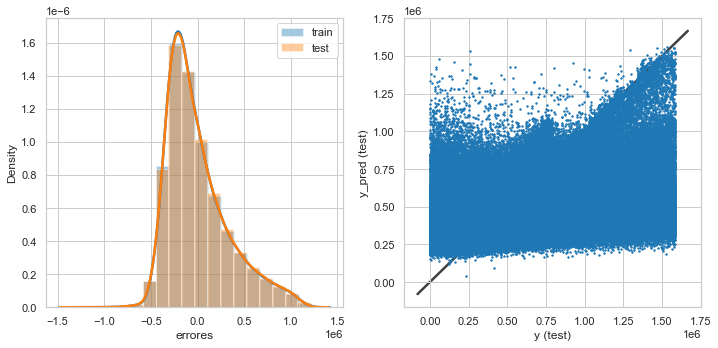

In [89]:
val_model(XGBre,X_train,X_test,y_train,y_test)

In [90]:
prediction = XGBre.predict(scaledf_test)

In [91]:
kaggle_submission_y = pd.DataFrame(prediction)
kaggle_submission_y.index = scaledf_test.index
kaggle_submission_y.index.name = 'id_registro'
kaggle_submission_y = kaggle_submission_y.rename(columns={0: 'gasto_familiar'})
kaggle_submission_y.to_csv("kaggle_submission_y6.csv")

Raíz del error cuadrático medio en Train: 329279.57322117395
Raíz del error cuadrático medio en Test: 338006.6156183384
MAPE Train: 22.985457529843856
MAPE Test: 64.58996829626652


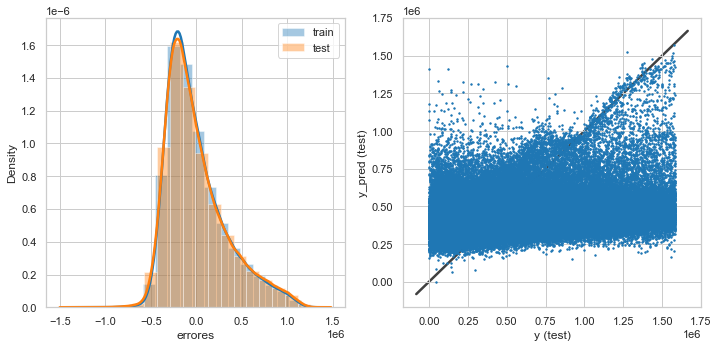

In [81]:
val_model(XGBre,X_train,X_test,y_train,y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

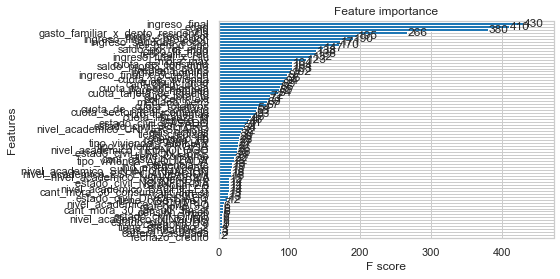

In [82]:
from xgboost import plot_importance
plot_importance(XGBre, height = 1)

## LightGBM

In [92]:
RANDOM_SEED = 42

In [93]:
param_lgbm = {
     'bagging_fraction': 0.5636740342598963,
     'feature_fraction': 0.37011678015410476,
     'learning_rate': 0.02338383151757914,
     'max_depth': int(13.85),
     'min_child_weight': int(21.49),
     'min_split_gain': 0.07374879816811401,
     'num_leaves': int(46.37),
     'application':'regression',
     'num_iterations': 5000,
     'metric': 'rmse'}

In [94]:
import lightgbm
lgbmax = lightgbm.LGBMRegressor(**param_lgbm, random_state = RANDOM_SEED, n_jobs=-1)

In [ ]:
lgbmax.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963


In [89]:
from sklearn.metrics import make_scorer
scoring = {'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error',
           'RMSE': 'neg_root_mean_squared_error',
          'R2': 'r2'}

In [ ]:
val_model(lgbmax,X_train,X_test,y_train,y_test)

Raíz del error cuadrático medio en Train: 315516.1700382458
Raíz del error cuadrático medio en Test: 336837.7584811802
MAPE Train: 20.457212768563494
MAPE Test: 65.10910173515578


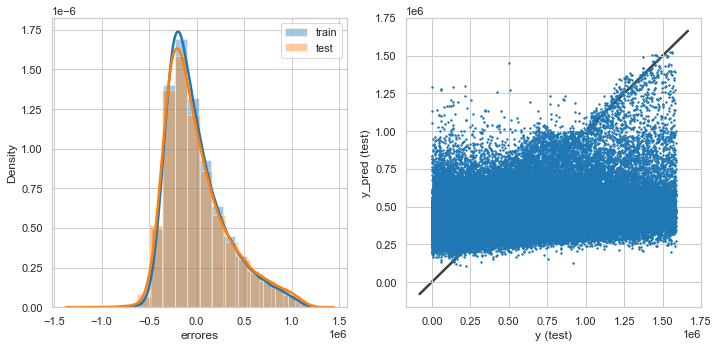

In [91]:
val_model(lgbmax,X_train,X_test,y_train,y_test)

In [90]:
scores = cross_validate(lgbmax, X, y, scoring = scoring,
                        cv = 5, return_train_score = True)
for key in scores.keys():
    print(f'{key}: {(scores[key].mean())}')
scores.keys()

[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963
[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963
[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963
[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will

dict_keys(['fit_time', 'score_time', 'test_MAE', 'train_MAE', 'test_MSE', 'train_MSE', 'test_RMSE', 'train_RMSE', 'test_R2', 'train_R2'])

In [93]:
scaledf

,edad,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,tenencia_tc,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,cat_ingreso,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,rep_calif_cred,pol_centr_ext,convenio_lib,genero_M,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_NO INFORMA,estado_civil_OTRO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO,cupo_total_tc,cuota_tc_bancolombia,cuota_cred_hipot,mediana_nom3,mediana_pen3,ingreso_nompen,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,ind,ingreso_nomina,ingreso_segurida_social,rel_period_ano,ingreso_final_x_profesion,ingreso_final_x_ocupacion,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,gasto_familiar
2593020#201907,51,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,-0.410496,-0.475678,-0.214626,-0.605366,-0.207628,-0.668175,-0.069261,-0.266593,-0.441337,-0.106057,-0.586702,-0.177644,-0.276427,-0.462652,-0.328547,-0.148142,-0.274543,-0.160508,0.169184,-0.504971,-0.480711,-0.942554,-0.053134,-0.423978,-0.310209,0.503169,111231.0
2317746#202003,51,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.410496,-0.475678,-0.214626,-0.605366,-0.207628,-0.668175,0.185325,3.159544,-0.441337,-0.106057,-0.586702,-0.177644,-0.276427,-0.462652,-0.328547,-0.148142,0.325931,-0.160508,-0.622668,-0.504971,-0.480711,0.016204,0.000090,-0.423978,-0.310209,0.549044,247185.0
3013139#202007,57,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,3,0,8,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.562565,2.937657,3.391710,2.998869,-0.207628,2.799056,1.409277,2.156598,2.765511,-0.106057,2.020223,-0.177644,-0.276427,-0.462652,-0.328547,-0.148142,0.524587,-0.160508,0.139131,3.164007,3.781390,-0.468140,0.010142,-0.423978,-0.310209,-0.177548,416249.0
5128933#201904,89,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.410496,-0.475678,-0.214626,-0.605366,-0.207628,-0.668175,1.311069,-0.266593,-0.441337,-0.106057,-0.586702,-0.177644,1.351845,-0.462652,-0.328547,-0.148142,-0.271906,-0.160508,1.620038,-0.504971,-0.480711,-0.088157,-0.053134,-0.860395,-0.007443,-0.177548,169256.0
4144437#202002,52,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.410496,-0.475678,-0.214626,-0.605366,-0.207628,-0.668175,0.913360,-0.266593,-0.217604,-0.106057,-0.586702,-0.177644,-0.276427,-0.462652,-0.328547,-0.148142,-0.274543,-0.160508,1.068737,-0.504971,-0.480711,1.816326,-0.053134,-0.860395,-0.310209,-0.192429,921980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244642#202010,40,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,8,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.410496,-0.475678,-0.214626,-0.605366,7.358344,2.459110,0.494321,-0.266593,-0.441337,-0.106057,-0.586702,-0.177644,-0.276427,-0.462652,-0.328547,-0.148142,-0.274543,-0.160508,1.087361,-0.504971,-0.480711,-0.468140,1.403114,-0.225021,-0.310209,-0.192429,595727.0
820352#201905,40,0,0,0,0,0,0,0,0,0

In [99]:
scaledf_test.drop('id_cli', axis = 1, inplace = True)

In [ ]:
scaledf_test.to_csv('scaledf_test.csv',index=True)

In [ ]:
scaledf = pd.read_csv("scaledf_test.csv", index_col=0)

In [ ]:
predictions = lgbmax.predict(scaledf_test, num_iteration = lgbmax.best_iteration_)

In [ ]:
kaggle_submission_y = pd.DataFrame(predictions)
kaggle_submission_y.index = scaledf_test.index
kaggle_submission_y.index.name = 'id_registro'
kaggle_submission_y = kaggle_submission_y.rename(columns={0: 'gasto_familiar'})
kaggle_submission_y.to_csv("kaggle_submission_y7.csv")

### Guardamos los dataset